In [2]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

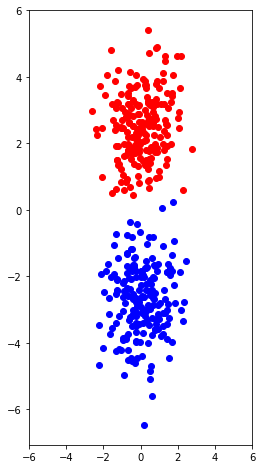

In [3]:
size=200
X0 = np.random.multivariate_normal([0, -2.5], np.identity(2), size=size) 
X1 = np.random.multivariate_normal([0, 2.5], np.identity(2), size=size)
plt.figure(figsize=(4, 8))
plt.xlim(-3, 3)
plt.xlim(-6, 6)
plt.plot(X0[:, 0], X0[:, 1], 'bo')
plt.plot(X1[:, 0], X1[:, 1], 'ro')
plt.show()
X = np.concatenate([X0, X1])
y = np.concatenate([np.zeros(size), np.ones(size)]).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
model = tf.keras.Sequential()
model.add(layers.Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', # work here
              metrics=['accuracy'])

model.fit(X_train, y_train)

300/300 [==============================] - 0s 321us/sample - loss: 0.0847 - accuracy: 0.9867


In [30]:
y_pred = model.predict_classes(X_test).reshape(y_test.shape)
print(f"Number of misclassifications: {np.sum(y_pred != y_test)}")

Number of misclassifications: 2


In [31]:
w, b = model.layers[0].get_weights()
print("Parameters:")
print(f"w[0] = {w[0][0]:.2f}, w[1] = {w[1][0]:.2f}, b = {b[0]:2f}")

Parameters:
w[0] = 0.81, w[1] = 1.33, b = 0.003530


In [24]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [32]:
sum(sigmoid(X_test.dot(w) + b)< 0.5)

array([48])

In [29]:
y_pred == (sigmoid(X_test.dot(w) + b) > 0.5).reshape(-1,)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [33]:
z = model.predict_proba(X_test)[:, 0]

In [34]:
z[:10]

array([0.00870064, 0.15262914, 0.04882598, 0.93099356, 0.8685206 ,
       0.0136646 , 0.99620384, 0.02151397, 0.98965806, 0.98365355],
      dtype=float32)

In [35]:
sigmoid(X_test.dot(w) + b)[:10].reshape(-1)

array([0.00870063, 0.15262915, 0.04882601, 0.93099351, 0.8685206 ,
       0.0136646 , 0.99620382, 0.02151399, 0.98965805, 0.98365355])

In [38]:
model = tf.keras.Sequential()
model.add(layers.Dense(2, input_dim=2, activation='relu'))
model.add(layers.Dense(1, input_dim=2, activation='sigmoid'))


# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop', # work here
#               metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
